In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris
import os

In [111]:
# Configurar estilo de visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [112]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', None) 
# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

In [113]:
# Setting paths
current_dir = os.getcwd()  # Use os.getcwd() to get the current working directory
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, "data")
file_path = os.path.join(data_dir, "")
cars_csv_path = os.path.join(data_dir, "clean_data_car.csv")
#----------------------------------------------------------------------------------------------------
# Creading dataframes
df_car = pd.read_csv(cars_csv_path)

In [114]:
df_car = pd.read_csv(cars_csv_path)
df_car.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,transmission_types,transmission_num,ext_col,int_col,accident,price
162445,163571,GMC,Yukon XL SLT,2018,46000,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Automatic,NaN,Black,Black,False,37500
117707,118528,Chevrolet,Altima 2.5 SV,2022,26895,Gasoline,2.5L I4 16V GDI DOHC Turbo,Automatic CVT,Automatic,NaN,Satin Steel Metallic,Jet Black,False,31871
16096,16221,Honda,Element EX,2008,181870,Gasoline,166.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,5-Speed A/T,Automatic,5.0,Silver,Gray,False,9000
86444,87063,RAM,1500 Rebel,2020,51300,Gasoline,395.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Automatic,NaN,Gray,Black,False,57000
29711,29940,Dodge,Ram 1500 ST,2003,80000,Gasoline,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,A/T,Automatic,NaN,Black,Gray,True,8900


In [115]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187218 entries, 0 to 187217
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  187218 non-null  int64  
 1   brand               187218 non-null  object 
 2   model               187218 non-null  object 
 3   model_year          187218 non-null  int64  
 4   milage              187218 non-null  int64  
 5   fuel_type           181378 non-null  object 
 6   engine              187218 non-null  object 
 7   transmission        187218 non-null  object 
 8   transmission_types  187218 non-null  object 
 9   transmission_num    103346 non-null  float64
 10  ext_col             187218 non-null  object 
 11  int_col             187218 non-null  object 
 12  accident            187218 non-null  bool   
 13  price               187218 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(8)
memory usage: 18.7+ MB


In [116]:
df_car.describe()

,id,model_year,milage,transmission_num,price
count,187218.000000,187218.000000,187218.000000,103346.000000,187218.000000
mean,94270.661186,2015.807994,66013.874093,7.080110,39688.024528
std,54414.209414,5.660894,49784.530015,1.753374,36067.460041
min,0.000000,1974.000000,100.000000,1.000000,2000.000000
25%,47155.250000,2013.000000,24500.000000,6.000000,16999.000000
50%,94264.500000,2017.000000,58000.000000,7.000000,30499.000000
75%,141386.750000,2020.000000,95500.000000,8.000000,49000.000000
max,188532.000000,2024.000000,405000.000000,10.000000,279991.000000


In [117]:
def check_missing_data(df_car):
    nulls = df_car.isnull().sum()
    null_percentage = (nulls / len(df_car) * 100).round(2)
    null_report = pd.DataFrame({'null content': nulls, 'null%':null_percentage})
    print(f"Qty of rows: ({len(df_car)})")
    print(null_report)

check_df = check_missing_data(df_car)
# Visualizar los datos faltantes  


Qty of rows: (187218)
                    null content  null%
id                             0   0.00
brand                          0   0.00
model                          0   0.00
model_year                     0   0.00
milage                         0   0.00
fuel_type                   5840   3.12
engine                         0   0.00
transmission                   0   0.00
transmission_types             0   0.00
transmission_num           83872  44.80
ext_col                        0   0.00
int_col                        0   0.00
accident                       0   0.00
price                          0   0.00


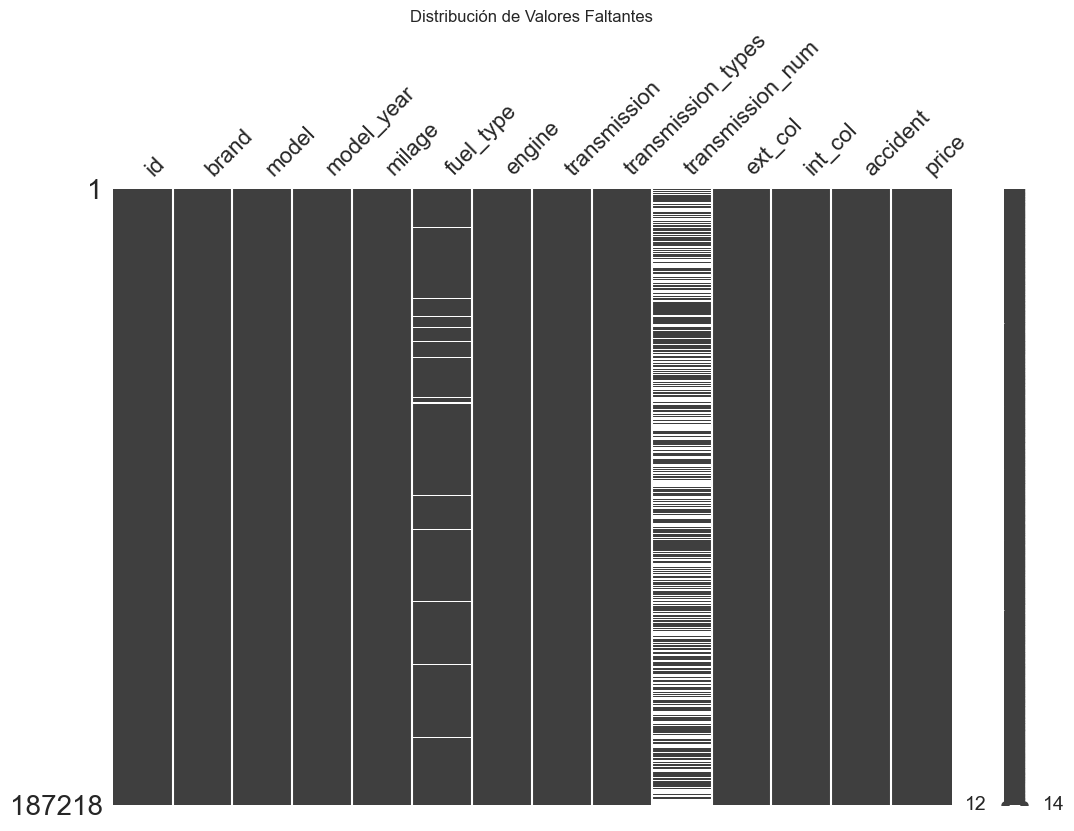

In [118]:
# Visualización de valores faltantes
msno.matrix(df_car, figsize=(12, 8))
plt.title('Distribución de Valores Faltantes')
plt.show()


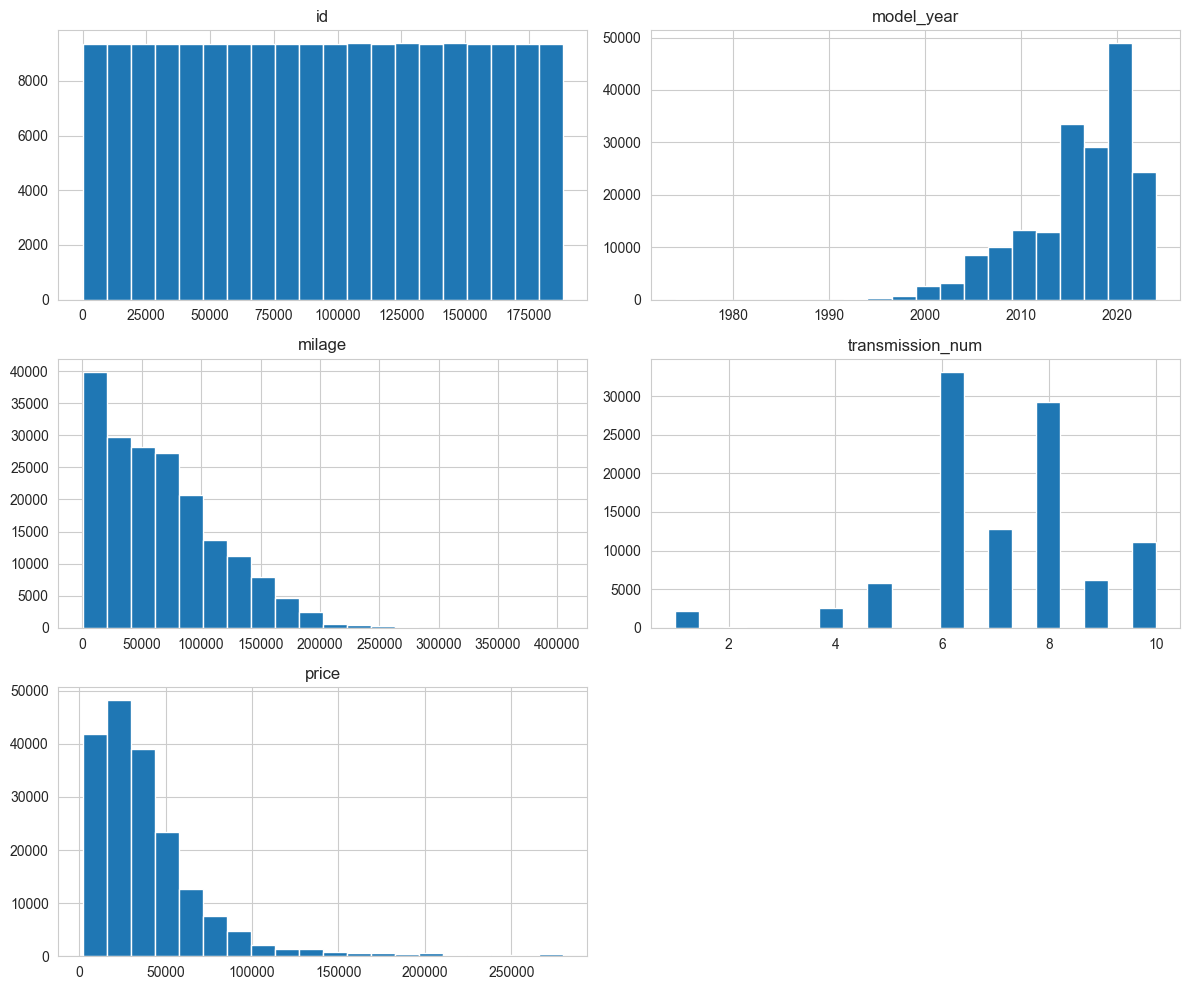

In [119]:
# Histogramas para todas las variables numéricas
df_car.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

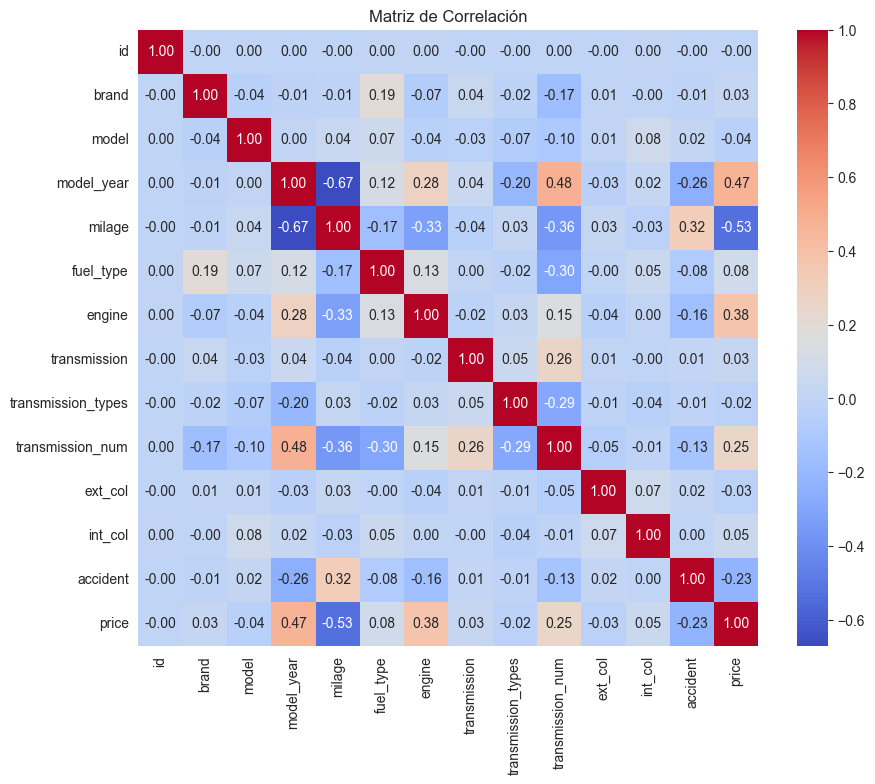

In [120]:
# Copiar el DataFrame original para no modificarlo directamente
df_encoded = df_car.copy()
# Codificar las columnas categóricas con LabelEncoder
label_encoder = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col].astype(str))

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [121]:
for col in df_car.select_dtypes(include=['float64', 'int64']).columns:
    stat, p = shapiro(df_car[col].dropna())
    print(f"{col}: p-value = {p:.4f}")  # p < 0.05 → no normal

id: p-value = 0.0000
model_year: p-value = 0.0000
milage: p-value = 0.0000
transmission_num: p-value = 0.0000
price: p-value = 0.0000


c:\Users\Administrator\Desktop\proyecto_5\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 187218.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Administrator\Desktop\proyecto_5\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 103346.
  res = hypotest_fun_out(*samples, **kwds)


Aquíiiiii-------------------

In [122]:
from scipy.stats import kstest
for col in df_car.select_dtypes(include=['float64', 'int64']).columns:
    data = df_car[col].dropna()
    stat, p = kstest(data, 'norm')
    print(f"{col}: p-value = {p:.4f}")

id: p-value = 0.0000
model_year: p-value = 0.0000
milage: p-value = 0.0000
transmission_num: p-value = 0.0000
price: p-value = 0.0000


In [123]:
target_corr = df_encoded.corr()["price"].sort_values(ascending=False)
print("\nCorrelación con la variable objetivo (price):\n", target_corr)


Correlación con la variable objetivo (price):
 price                 1.000000
model_year            0.470146
engine                0.375559
transmission_num      0.250111
fuel_type             0.084080
int_col               0.049816
transmission          0.031817
brand                 0.026286
id                   -0.000226
transmission_types   -0.024250
ext_col              -0.030616
model                -0.043179
accident             -0.229983
milage               -0.526785
Name: price, dtype: float64


In [125]:
# from scipy.stats import shapiro

# for col in df_car.select_dtypes(include=['float64', 'int64']).columns:
#     stat, p = shapiro(df_car[col].dropna())
#     print(f"{col}: p-value = {p:.4f}")  # p < 0.05 → no normal

In [126]:
from scipy.stats import kstest

for col in df_car.select_dtypes(include=['float64', 'int64']).columns:
    data = df_car[col].dropna()
    stat, p = kstest(data, 'norm')
    print(f"{col}: p-value = {p:.4f}")

id: p-value = 0.0000
model_year: p-value = 0.0000
milage: p-value = 0.0000
transmission_num: p-value = 0.0000
price: p-value = 0.0000


In [127]:
from scipy.stats import f_oneway

# Ejemplo: Comparar 'strength' entre grupos (si hay una columna categórica)
if 'cement_type' in df_car.columns:
    groups = [df_car[df_car['cement_type'] == g]['price'] for g in df_car['milage'].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA p-value: {p_value:.4f}")

In [128]:
from scipy.stats import ttest_ind

# Ejemplo: Comparar 'strength' entre dos grupos específicos
group_a = df_car[df_car['model_year'] == 'A']['price']
group_b = df_car[df_car['model_year'] == 'B']['price']
t_stat, p_value = ttest_ind(group_a, group_b)
print(f"t-test p-value: {p_value:.4f}")

t-test p-value: nan


c:\Users\Administrator\Desktop\proyecto_5\.venv\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


## Realizando pruebas parametricas


In [146]:
from scipy.stats import anderson
result = anderson(df_car["price"])
print("Estadístico AD:", result.statistic)
print("Valores críticos:", result.critical_values)



Estadístico AD: 10528.303305712994
Valores críticos: [0.576 0.656 0.787 0.918 1.092]


## Explicaión de este resultado 
 ¿Qué significan estos valores?
Estadístico AD (10528.30):

Es el valor calculado de la prueba. Cuanto mayor sea, más evidencia hay de no normalidad.

En tu caso, es extremadamente alto (¡10528!), lo que indica una desviación masiva de la normalidad.

Valores críticos:

Son umbrales de referencia para diferentes niveles de significancia (15%, 10%, 5%, 2.5%, 1%).

Si el estadístico AD > valor crítico, se rechaza la normalidad en ese nivel de significancia.

Nivel de Significancia	Valor Crítico	Comparación con AD (10528)	Conclusión
15%	0.576	10528 > 0.576	Rechaza normalidad
10%	0.656	10528 > 0.656	Rechaza normalidad
5%	0.787	10528 > 0.787	Rechaza normalidad (estándar)
2.5%	0.918	10528 > 0.918	Rechaza normalidad
1%	1.092	10528 > 1.092	Rechaza normalidad
📌 Conclusión Clave:
Los datos de precios NO siguen una distribución normal en ningún nivel de significancia común (ni siquiera al 1%, el más estricto).

Esto es consistente con tu prueba de Shapiro-Wilk (p-valor ≈ 0).



In [147]:
# Ejemplo para comparar varianzas entre grupos (ej: precios por marca)
levene_test = stats.levene(
    df_car[df_car["model_year"] == "milage"]["price"],
    df_car[df_car["model_year"] == "milage"]["price"]
)
print("Levene p-valor:", levene_test.pvalue)

Levene p-valor: nan


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\3732061769.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  levene_test = stats.levene(


Interpretación del Resultado de Levene (p-valor: nan)
El error ocurre porque uno o ambos grupos comparados tienen un tamaño muestral demasiado pequeño para aplicar la prueba de Levene. La función levene() de SciPy requiere un mínimo de observaciones por grupo para calcular las varianzas de manera confiable, y si no se cumple, devuelve NaN.



In [149]:
print(df_car["model_year"].unique())


[2007 2002 2017 2021 2018 2016 2020 2015 2011 2013 2023 2019 2012 2014
 2008 2009 2022 2003 2005 2001 2006 2000 2010 2004 1997 1998 1999 1994
 1993 1996 1995 2024 1974 1992]


In [152]:
t_test = stats.ttest_ind(
    df_car[df_car["model_year"] == "milage"]["price"],
    df_car[df_car["model_year"] == "engine"]["price"],
    equal_var=True  # Si homocedasticidad = True
)
print("t-test p-valor:", t_test.pvalue)

t-test p-valor: nan


In [153]:
anova_test = stats.f_oneway(
    df_car[df_car["model_year"] == "brand"]["price"],
    df_car[df_car["model_year"] == "brand"]["price"],
    df_car[df_car["model_year"] == "brand"]["price"]
)
print("ANOVA p-valor:", anova_test.pvalue)

ANOVA p-valor: nan


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\2782279036.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_test = stats.f_oneway(


           price    milage
price   1.000000 -0.526785
milage -0.526785  1.000000
Correlación: -0.527, p-valor: 0.00000


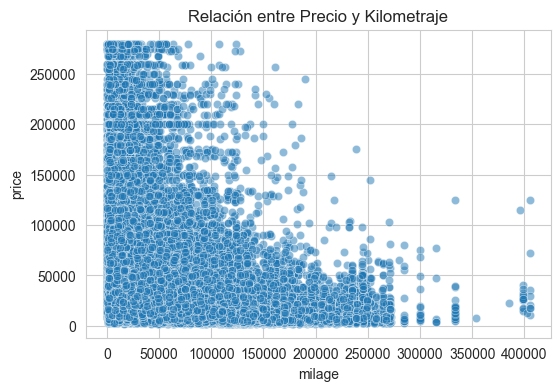

In [155]:
pearson_corr = df_car[["price", "milage"]].corr(method="pearson")
print(pearson_corr)

from scipy.stats import pearsonr

corr, p_value = pearsonr(df_car["price"], df_car["milage"])
print(f"Correlación: {corr:.3f}, p-valor: {p_value:.5f}")
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df_car, x="milage", y="price", alpha=0.5)
plt.title("Relación entre Precio y Kilometraje")
plt.show()

## Realizando pruebas no parametricas


In [137]:
#Prueba de Mann-Whitney U (Wilcoxon rank-sum)
from scipy import stats

grupo_toyota = df_car[df_car["milage"] == "Toyota"]["price"]
grupo_ford = df_car[df_car["milage"] == "Ford"]["price"]

stats.mannwhitneyu(grupo_toyota, grupo_ford)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\2025106419.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats.mannwhitneyu(grupo_toyota, grupo_ford)


MannwhitneyuResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [105]:
grupo_toyota = df_car[df_car["model_year"] == "Toyota"]["price"]
grupo_ford = df_car[df_car["model_year"] == "Ford"]["price"]
grupo_chevrolet = df_car[df_car["model_year"] == "Chevrolet"]["price"]

stats.kruskal(grupo_toyota, grupo_ford, grupo_chevrolet)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\2879208288.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats.kruskal(grupo_toyota, grupo_ford, grupo_chevrolet)


KruskalResult(statistic=np.float64(nan), pvalue=np.float64(nan))

In [ ]:
# Spearman
df_car[["price", "milage"]].corr(method="spearman")

# Kendall
df_car[["price", "milage"]].corr(method="kendall")

,price,milage
price,1.000000,-0.553203
milage,-0.553203,1.000000


In [107]:
stats.fligner(
    df_car[df_car["model_year"] == "Toyota"]["price"],
    df_car[df_car["model_year"] == "Ford"]["price"]
)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2036\1524381687.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats.fligner(


FlignerResult(statistic=np.float64(nan), pvalue=np.float64(nan))